In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
data_set = pd.read_csv("Customer-Churn-Prediction.csv")

In [4]:
data_set.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
558,2501-XWWTZ,Male,0,No,No,11,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,70.20,760.05,No
60,0434-CSFON,Female,0,Yes,No,47,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.50,4707.1,No
2012,6845-RGTYS,Female,0,Yes,No,47,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,98.75,4533.7,Yes


In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data_set.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162289,32.370865,64.761692
std,0.368742,24.559231,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data_set.shape

(7043, 21)

In [8]:
data_set.drop_duplicates(inplace =True)

In [9]:
data_set.shape

(7043, 21)

In [10]:
data_set.isnull().values.any()

False

In [11]:
data_set.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
data_set.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

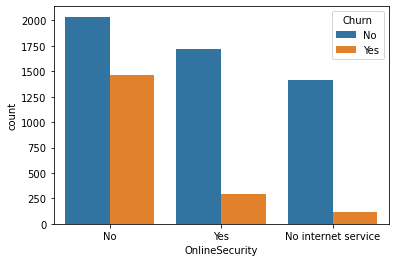

In [13]:
sns.countplot(x = "OnlineSecurity" , hue = "Churn",data = data_set)

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

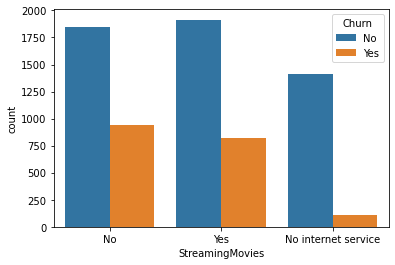

In [14]:
sns.countplot(x = "StreamingMovies",hue = "Churn",data =data_set)

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

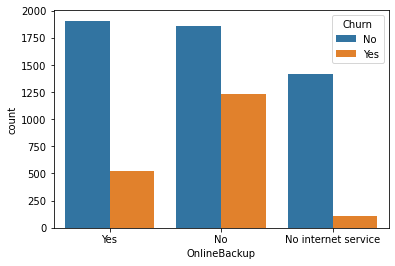

In [15]:
sns.countplot(x = "OnlineBackup",hue = "Churn",data =data_set)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

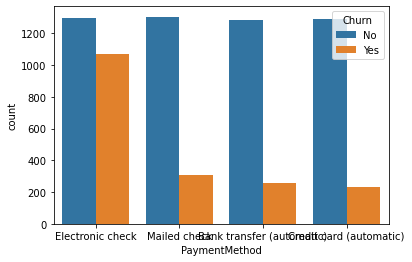

In [16]:
sns.countplot(x = "PaymentMethod", hue = "Churn", data = data_set)


In [17]:
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype


for c in data_set.columns:
    if is_numeric_dtype(data_set[c]):
        continue
    else:
        data_set[c] = LabelEncoder().fit_transform(data_set[c])

In [18]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [19]:
x = data_set.drop("Churn",axis = 1)
y = data_set.Churn

In [20]:
x.shape


(7043, 20)

In [21]:
y.shape

(7043,)

In [22]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [23]:
not_churned = (5174/(5174+1869)) * 100
churned = (1869/(5174+1869)) * 100

In [24]:
print(f"Not churned {not_churned} percent of total people")
print(f"Churned {churned} percent of total people")

Not churned 73.4630129206304 percent of total people
Churned 26.536987079369588 percent of total people


# Imbalanced Data Handling and Apply KNN_Classifier 

In [25]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [26]:
from imblearn.over_sampling import RandomOverSampler
RS = RandomOverSampler(random_state =100)



In [27]:
over_x,over_y = RS.fit_resample(x,y)
over_x.shape

(10348, 20)

In [28]:
over_y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [30]:
from imblearn.under_sampling import NearMiss
NM = NearMiss()

In [31]:
under_x , under_y = NM.fit_resample(x,y)
under_x.shape

(3738, 20)

In [32]:
under_y.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [34]:
from imblearn.combine import SMOTETomek
SM = SMOTETomek(random_state = 42)

In [35]:
combine_x , combine_y = SM.fit_resample(x,y)
combine_x.shape

(9474, 20)

In [36]:
combine_y.value_counts()

0    4737
1    4737
Name: Churn, dtype: int64

# Hold Out Cross Validation

In [38]:
from sklearn.model_selection import train_test_split 

from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()

In [39]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.30 ,random_state =1)
KNC.fit(xtrain,ytrain)

Normal_dataset_accuracy = KNC.score(xtest,ytest)

Normal_dataset_accuracy

0.7075248461902508

In [40]:
over_xtrain,over_xtest,over_ytrain,over_ytest = train_test_split(over_x,over_y,test_size = 0.30 ,random_state =42)
KNC.fit(over_xtrain,over_ytrain)

OverSampleing_dataset_accuracy = KNC.score(over_xtest,over_ytest)

OverSampleing_dataset_accuracy

0.6302737520128825

In [41]:
under_xtrain,under_xtest,under_ytrain,under_ytest = train_test_split(under_x,under_y,test_size = 0.30 ,random_state =1)
KNC.fit(under_xtrain,under_ytrain)

UnderSampleing_dataset_accuracy = KNC.score(under_xtest,under_ytest)

UnderSampleing_dataset_accuracy

0.4411764705882353

In [42]:
combine_xtrain,combine_xtest,combine_ytrain,combine_ytest = train_test_split(combine_x,combine_y,test_size = 0.30 ,random_state =1)
KNC.fit(combine_xtrain,combine_ytrain)

CombineSampleing_dataset_accuracy = KNC.score(combine_xtest,combine_ytest)

CombineSampleing_dataset_accuracy

0.6915230390432642

# K Fold Cross Validation

In [48]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 4)

NormalDataset_kfold_result = cross_val_score(KNC,x,y,cv = kfold)

NormalDataset_kfold_result


array([0.69846678, 0.67915957, 0.68654174, 0.67556818])

In [49]:
NormalDataset_kfold_acurracy = NormalDataset_kfold_result.mean()
NormalDataset_kfold_acurracy 

0.684934067033194

In [50]:
OverSampleingDataset_kfold_result = cross_val_score(KNC,over_x,over_y,cv = kfold)

OverSampleingDataset_kfold_result

array([0.53730189, 0.54310012, 0.65597217, 0.53382296])

In [51]:
OverSampleingDataset_kfold_accuracy = OverSampleingDataset_kfold_result.mean()

OverSampleingDataset_kfold_accuracy


0.5675492848859682

In [52]:

UnderSampleingDataset_kfold_result = cross_val_score(KNC,under_x,under_y,cv = kfold)

UnderSampleingDataset_kfold_result

array([0.07807487, 0.19037433, 0.11777302, 0.11991435])

In [53]:
UnderSampleingDataset_kfold_accuracy = UnderSampleingDataset_kfold_result.mean()

UnderSampleingDataset_kfold_accuracy


0.12653414100699653

In [54]:
CombineSampleingDataset_kfold_result = cross_val_score(KNC,combine_x,combine_y,cv = kfold)

CombineSampleingDataset_kfold_result

array([0.5964542 , 0.59012241, 0.71072635, 0.63935811])

In [55]:
CombineSampleingDataset_kfold_accuracy = CombineSampleingDataset_kfold_result.mean()

CombineSampleingDataset_kfold_accuracy


0.6341652685161945

# Stratified k fold cross Validation

In [62]:
from sklearn.model_selection import StratifiedKFold

Sf_Kfold = StratifiedKFold(n_splits = 4)

NormalDataset_Sf_Kfold_result = cross_val_score(KNC,x,y,cv = Sf_Kfold)

NormalDataset_Sf_Kfold_result


array([0.6967632 , 0.67745599, 0.68256672, 0.68181818])

In [59]:
NormalDataset_Sf_Kfold_accuracy = NormalDataset_Sf_Kfold_result.mean()

NormalDataset_Sf_Kfold_accuracy

0.6846510247276857

In [60]:
OverSampleingDataset_Sf_kfold_result = cross_val_score(KNC,over_x,over_y,cv = Sf_Kfold)

OverSampleingDataset_Sf_kfold_result

array([0.63509857, 0.65094704, 0.67027445, 0.67800541])

In [61]:
OverSampleingDataset_Sf_kfold_accuracy = OverSampleingDataset_Sf_kfold_result.mean()

OverSampleingDataset_Sf_kfold_accuracy


0.6585813683803634

In [63]:
UnderSampleingDataset_SF_kfold_result = cross_val_score(KNC,under_x,under_y,cv = Sf_Kfold)

UnderSampleingDataset_SF_kfold_accuracy = UnderSampleingDataset_SF_kfold_result.mean()

UnderSampleingDataset_SF_kfold_accuracy

0.4234979216526011

In [64]:
CombineSampleingDataset_Sf_kfold_result = cross_val_score(KNC,combine_x,combine_y,cv = Sf_Kfold)

CombineSampleingDataset_Sf_kfold_accuracy = CombineSampleingDataset_Sf_kfold_result.mean()

CombineSampleingDataset_Sf_kfold_accuracy

0.709523009052742

# Leave One Out Cross Validation

In [67]:
from sklearn.model_selection import LeaveOneOut
le = LeaveOneOut()

In [68]:
NormalDataset_LeaveOneOut_result = cross_val_score(KNC,x,y,cv = le)

NormalDataset_LeaveOneOut_accuracy = NormalDataset_LeaveOneOut_result.mean()
NormalDataset_LeaveOneOut_accuracy

KeyboardInterrupt: 

In [ ]:
OverSampleingDataset_LeaveOneOut_result = cross_val_score(KNC,over_x,over_y,cv = le)

OverSampleingDataset_LeaveOneOut_accracy = OverSampleingDataset_LeaveOneOut_result.mean() 

OverSampleingDataset_LeaveOneOut_accracy

In [ ]:
UnderSampleingDataset_LeaveOneOut_result = cross_val_score(KNC,under_x,under_y,cv = leK)

UnderSampleingDataset_LeaveOneOut_accuracy = UnderSampleingDataset_LeaveOneOut_result.mean()

UnderSampleingDataset_LeaveOneOut_accuracy

In [ ]:
CombineSampleingDataset_LeaveOneOut_result = cross_val_score(KNC,combine_x,combine_y,cv = le)

CombineSampleingDataset_LeaveOneOut_accuracy = CombineSampleingDataset_LeaveOneOut_result.mean()

CombineSampleingDataset_LeaveOneOut_accuracy

# Best model_Accuracy = CombineSampleingDataset_Sf_kfold_result

In [69]:
CombineSampleingDataset_Sf_kfold_result.mean()

0.709523009052742

# After Tuning 

In [70]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = [int(item) for item in np.linspace(10,100,25)]
weight = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

parameters = {
    "n_neighbors":n_neighbors,
    "weights" : weight ,
    "algorithm": algorithm
    }

rscv = RandomizedSearchCV(KNC,parameters,n_iter=200, cv = 4)

In [71]:
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=4, estimator=KNeighborsClassifier(), n_iter=200,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [10, 13, 17, 21, 25, 28,
                                                        32, 36, 40, 43, 47, 51,
                                                        55, 58, 62, 66, 70, 73,
                                                        77, 81, 85, 88, 92, 96,
                                                        100],
                                        'weights': ['uniform', 'distance']})

In [72]:
result = pd.DataFrame(rscv.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000500,0.000866,0.101397,0.006985,uniform,10,auto,"{'weights': 'uniform', 'n_neighbors': 10, 'alg...",0.716951,0.721817,0.724026,0.710227,0.718255,0.005295,181
1,0.000000,0.000000,0.087150,0.009176,distance,10,auto,"{'weights': 'distance', 'n_neighbors': 10, 'al...",0.711273,0.706407,0.710227,0.684253,0.703040,0.010997,197
2,0.004407,0.006529,0.099714,0.009497,uniform,13,auto,"{'weights': 'uniform', 'n_neighbors': 13, 'alg...",0.711273,0.721006,0.723214,0.706169,0.715416,0.006977,189
3,0.005157,0.006140,0.087495,0.009216,distance,13,auto,"{'weights': 'distance', 'n_neighbors': 13, 'al...",0.716139,0.716139,0.720779,0.695617,0.712169,0.009742,193
4,0.000000,0.000000,0.105147,0.007346,uniform,17,auto,"{'weights': 'uniform', 'n_neighbors': 17, 'alg...",0.716139,0.722628,0.719968,0.709416,0.717038,0.004968,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.003907,0.006767,0.100175,0.006176,distance,92,brute,"{'weights': 'distance', 'n_neighbors': 92, 'al...",0.729927,0.726683,0.728896,0.728084,0.728398,0.001186,45
196,0.004312,0.007469,0.111830,0.002583,uniform,96,brute,"{'weights': 'uniform', 'n_neighbors': 96, 'alg...",0.728305,0.727494,0.728084,0.728084,0.727992,0.000301,81
197,0.000507,0.000878,0.098422,0.006448,distance,96,brute,"{'weights': 'distance', 'n_neighbors': 96, 'al...",0.729927,0.727494,0.728896,0.728084,0.728600,0.000913,33
198,0.000000,0.000000,0.109382,0.000005,uniform,100,brute,"{'weights': 'uniform', 'n_neighbors': 100, 'al...",0.728305,0.727494,0.728084,0.728084,0.727992,0.000301,81


In [73]:
rscv.best_score_

0.7300196635278753

In [74]:
rscv.best_estimator_

KNeighborsClassifier(n_neighbors=43, weights='distance')

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
gscv = GridSearchCV(KNC,parameters)
gscv.fit(xtrain,ytrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [10, 13, 17, 21, 25, 28, 32, 36, 40, 43,
                                         47, 51, 55, 58, 62, 66, 70, 73, 77, 81,
                                         85, 88, 92, 96, 100],
                         'weights': ['uniform', 'distance']})

In [77]:
result2 = pd.DataFrame(gscv.cv_results_)
result2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000399,0.000798,0.086466,0.007064,auto,10,uniform,"{'algorithm': 'auto', 'n_neighbors': 10, 'weig...",0.720081,0.708925,0.721095,0.717039,0.712982,0.716024,0.004536,185
1,0.003125,0.006251,0.071879,0.007656,auto,10,distance,"{'algorithm': 'auto', 'n_neighbors': 10, 'weig...",0.716024,0.703854,0.697769,0.706897,0.690669,0.703043,0.008543,197
2,0.009375,0.007655,0.081546,0.004661,auto,13,uniform,"{'algorithm': 'auto', 'n_neighbors': 13, 'weig...",0.720081,0.701826,0.717039,0.723124,0.702840,0.712982,0.008911,189
3,0.005710,0.007046,0.073206,0.005528,auto,13,distance,"{'algorithm': 'auto', 'n_neighbors': 13, 'weig...",0.720081,0.708925,0.705882,0.715010,0.701826,0.710345,0.006497,193
4,0.004325,0.005703,0.087303,0.007072,auto,17,uniform,"{'algorithm': 'auto', 'n_neighbors': 17, 'weig...",0.722110,0.716024,0.726166,0.726166,0.720081,0.722110,0.003849,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.003125,0.006250,0.093757,0.009883,brute,92,distance,"{'algorithm': 'brute', 'n_neighbors': 92, 'wei...",0.730223,0.729209,0.728195,0.728195,0.728195,0.728803,0.000811,49
196,0.000000,0.000000,0.113972,0.014558,brute,96,uniform,"{'algorithm': 'brute', 'n_neighbors': 96, 'wei...",0.728195,0.728195,0.728195,0.728195,0.727181,0.727992,0.000406,81
197,0.003125,0.006250,0.093756,0.009883,brute,96,distance,"{'algorithm': 'brute', 'n_neighbors': 96, 'wei...",0.730223,0.729209,0.728195,0.728195,0.728195,0.728803,0.000811,49
198,0.006250,0.007655,0.104793,0.006206,brute,100,uniform,"{'algorithm': 'brute', 'n_neighbors': 100, 'we...",0.728195,0.728195,0.728195,0.728195,0.727181,0.727992,0.000406,81


In [78]:
gscv.best_score_

0.7302231237322516

In [79]:
gscv.best_estimator_

KNeighborsClassifier(n_neighbors=51, weights='distance')

In [80]:
KNC_Rscv_Tuning = KNeighborsClassifier(n_neighbors=43, weights='distance')

KNC_Gscv_Tuning = KNeighborsClassifier(n_neighbors=51, weights='distance')




In [81]:
CombineSampleingDataset_Sf_kfold_result_Rscv_Tuning = cross_val_score(KNC_Rscv_Tuning,combine_x,combine_y,cv = Sf_Kfold)

CombineSampleingDataset_Sf_kfold_result_Rscv_Tuning.mean()

0.7116338716301782

In [82]:

CombineSampleingDataset_Sf_kfold_result_Gscv_Tuning = cross_val_score(KNC_Gscv_Tuning,combine_x,combine_y,cv = Sf_Kfold)

CombineSampleingDataset_Sf_kfold_result_Gscv_Tuning.mean()

0.7061447643691603

In [83]:
CombineSampleingDataset_Sf_kfold_accuracy

0.709523009052742